In [6]:
import pandas as pd
import numpy as np

In [7]:
pd.__version__

'1.1.3'

#### The Python datetime Module

In [8]:
# agenda:
#   - the "what" and "why" of datetime module
#   - date class
#   - time class
#   - the datetime class

In [9]:
from datetime import date, time, datetime

In [10]:
# year - month - day

In [11]:



date_A = date(2020, 4, 25)

In [12]:
date_A

datetime.date(2020, 4, 25)

In [13]:
type(date_A)

datetime.date

In [14]:
A = "2020, 4, 25"

In [15]:
date_A.day

25

In [16]:
date_A.year

2020

In [17]:
date_A.month

4

In [18]:
# the time class

In [19]:
# hour - minute - second - microsecond

In [20]:
time_A = time(4, 30 , 12, 943212)

In [21]:
time_A

datetime.time(4, 30, 12, 943212)

In [22]:
type(time_A)

datetime.time

In [23]:
time_B = time(6)

In [24]:
time_B

datetime.time(6, 0)

In [25]:
time_A.second

12

In [26]:
time_B.microsecond

0

In [27]:
time_A.isoformat()

'04:30:12.943212'

In [28]:
time_A

datetime.time(4, 30, 12, 943212)

In [29]:
# the datetime class

In [30]:
dt_A = datetime(2020, 4, 25, 19, 1, 23, 123123)

In [31]:
dt_A

datetime.datetime(2020, 4, 25, 19, 1, 23, 123123)

In [32]:
type(dt_A)

datetime.datetime

In [33]:
datetime.now()

datetime.datetime(2023, 2, 8, 8, 35, 4, 278941)

In [34]:
dt_A.year

2020

In [35]:
dt_A.microsecond

123123

In [36]:
print(dt_A)

2020-04-25 19:01:23.123123


In [37]:
dt_A

datetime.datetime(2020, 4, 25, 19, 1, 23, 123123)

#### Parsing Dates From Text

In [38]:
# what if we don't have date objects?

In [39]:
# datetime -> strptime (string parse time)

In [40]:
'2019-10-31'.year

AttributeError: 'str' object has no attribute 'year'

In [41]:
dt_B = datetime.strptime('2019-10-31', '%Y-%m-%d')

In [42]:
dt_B.year

2019

In [43]:
dt_B.isoformat()

'2019-10-31T00:00:00'

In [44]:
# another example

In [45]:
try_this = "jan 20 2090; 4pm"

In [46]:
datetime.strptime(try_this, '%b %d %Y; %I%p')

datetime.datetime(2090, 1, 20, 16, 0)

In [47]:
datetime.strptime("jan 20 2090; 4pm", '%b %d %Y; %I%p')

datetime.datetime(2090, 1, 20, 16, 0)

#### Even Better: dateutil

In [48]:
!pip show python-dateutil

Name: python-dateutil
Version: 2.8.1
Summary: Extensions to the standard Python datetime module
Home-page: https://dateutil.readthedocs.io
Author: Gustavo Niemeyer
Author-email: gustavo@niemeyer.net
License: Dual License
Location: c:\programdata\anaconda3\lib\site-packages
Requires: six
Required-by: pandas, matplotlib, jupyter-client, bokeh, anaconda-client


In [49]:
!pip install python-dateutil

In [50]:
from dateutil import parser

In [51]:
parser.parse('jan 21st 1990')

datetime.datetime(1990, 1, 21, 0, 0)

In [52]:
parser.parse('22 april 2068 at 4pm and 17minutes;; 20 seconds')

datetime.datetime(2068, 4, 22, 16, 17, 20)

#### From Datetime To String

In [53]:
#  convert text to dates:
  #  - datetime strptime()
  #  - datetutil parse()

In [54]:
# the strftime()

In [55]:
dt = datetime.now()

In [56]:
dt

datetime.datetime(2023, 2, 8, 8, 35, 56, 957297)

In [57]:
dt.strftime('%Y')

'2023'

In [58]:
dt.strftime('Year: %Y; Month: %m; Day: %d')

'Year: 2023; Month: 02; Day: 08'

In [59]:
dt.strftime('%c')

'Wed Feb  8 08:35:56 2023'

In [60]:
# an alternative approach:

In [61]:
"My date is {:%c}"

'My date is {:%c}'

In [62]:
"My date is {:%c}".format(dt)

'My date is Wed Feb  8 08:35:56 2023'

#### Performant Datetimes With Numpy

In [63]:
# previously: python time, date, datetime from datetime module

In [64]:
# agenda:
  # - the numpy datetime64 
  # - tradeoff between precision and span
  # - vectorized operation on arrays of dates

In [65]:
a = np.datetime64('2020-03-04')

In [66]:
b = np.datetime64(datetime.now())

In [67]:
a

numpy.datetime64('2020-03-04')

In [68]:
a+10

numpy.datetime64('2020-03-14')

In [69]:
b

numpy.datetime64('2023-02-08T08:36:19.933385')

In [70]:
b + 10

numpy.datetime64('2023-02-08T08:36:19.933395')

In [71]:
np.datetime64(b, 'D')

numpy.datetime64('2023-02-08')

In [72]:
np.datetime64(b, 'D') + 10

numpy.datetime64('2023-02-18')

In [71]:
# vectorized ops

In [73]:
dates = np.array([
          '2019-02-20',
          '2019-06-20',
          '2090-03-23'
], dtype=np.datetime64)

In [74]:
dates - 10

array(['2019-02-10', '2019-06-10', '2090-03-13'], dtype='datetime64[D]')

In [75]:
# ...what about business days

In [76]:
np.busday_offset(dates, offsets=-10, roll='backward')

array(['2019-02-06', '2019-06-06', '2090-03-09'], dtype='datetime64[D]')

#### The Pandas Timestamp

In [73]:
# pandas timestamp = python datetime + numpy datetime64

In [74]:
pd.Timestamp("4th of July 1776")

Timestamp('1776-07-04 00:00:00')

In [75]:
pd.Timestamp('4/7/1776')

Timestamp('1776-04-07 00:00:00')

In [76]:
pdts = pd.to_datetime('4/7/1776', dayfirst=True)

In [77]:
pdts

Timestamp('1776-07-04 00:00:00')

In [78]:
pdts.day_name()

'Thursday'

In [79]:
pdts.days_in_month

31

In [80]:
pdts.quarter

3

In [81]:
pdts.isocalendar()  # (year,week,dayofweek)

(1776, 27, 4)

#### Our Dataset: Brent Prices


> https://andybek.com/pandas-oil

*...and attached as a resource!*



In [85]:
#oil_url = 'https://andybek.com/pandas-oil'
oil_url = r'C:\Users\palab\Data_Analyst_Course_1_Andy_Bek\1.Files\BrentOilPrices.csv'

In [86]:
brent = pd.read_csv(oil_url)

In [87]:
brent.head()

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77


In [88]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.5+ KB


#### Date Parsing And DatetimeIndex 

In [89]:
brent.head()

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77


In [90]:
brent.dtypes

Date      object
Price    float64
dtype: object

In [91]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 362.6 KB


In [92]:
brent.Date = brent.Date.astype(np.datetime64)

In [93]:
brent.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [94]:
# ns -> nanosecond -> 1/billionth of a second -> 10 ^ -9

In [95]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5016 non-null   datetime64[ns]
 1   Price   5016 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.5 KB


In [96]:
brent.set_index('Date', inplace=True)

In [97]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [98]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [99]:
pd.to_datetime(['3 june 2020', 'jun 20 2030'])

DatetimeIndex(['2020-06-03', '2030-06-20'], dtype='datetime64[ns]', freq=None)

#### A Cool Shorcut: read_csv() With parse_dates

In [100]:
# Previously:
  # - import data
  # - parse date column
  # - re-assign

In [102]:
brent2 = pd.read_csv(oil_url, index_col=0, parse_dates=True)

In [103]:
brent2.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [104]:
# if poor data quality this may not be the best option

#### Indexing Dates

In [105]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [106]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [107]:
# Q: select the brent price on Jan 3rd 2017

In [108]:
brent.loc['2017-01-03']

Price    55.05
Name: 2017-01-03 00:00:00, dtype: float64

In [109]:
# Q: seelect prices from jan 3rd to jan 6th

In [110]:
brent.loc['2017-01-03':'2017-01-06']

,Price
Date,
2017-01-03,55.05
2017-01-04,54.57
2017-01-05,54.99
2017-01-06,55.90


In [111]:
# Q: select all prices from Jan 2019

In [112]:
brent.loc['2019-01-02':'2019-01-31']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [113]:
brent.loc['2019-01'] # partial string indexing

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [114]:
# Q: prices from the first two months of 2019

In [115]:
brent.loc['2019-01':'2019-02']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [116]:
# Q: select prices from July 2019 to mid Aug 2019

In [117]:
brent['2019-07':'2019-08-15']

,Price
Date,
2019-07-01,65.10
2019-07-02,62.72
2019-07-03,63.53
2019-07-04,63.62
2019-07-05,64.23
2019-07-08,64.89
2019-07-09,64.30
2019-07-10,66.41
2019-07-11,67.64


#### Skill Challenge

###### **1.**

Using the *brent* time series, create a shorter dataframe that only contains the dates from 1 December 2015 to 31 March 2016.

###### **2.**

Repeat the above, but this time usng partial string indexing instead of specifying full dates. What was the standard deviation of prices during this period?

###### **3.**

Was the mean price from February 2018 greater or less than the median price from March 2017?

#### Solution

In [118]:
# 1

In [119]:
brent.loc['12/1/2015':'3/31/2016']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


In [120]:
# 2

In [121]:
brent.loc['12/2015':'3/2016']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


In [122]:
brent.loc['dec 2015': 'march 2016'].std()

Price    3.990123
dtype: float64

In [123]:
# 3

In [124]:
brent.loc['feb 2018'].mean() > brent.loc['july 2017'].median()

Price    True
dtype: bool

#### DateTimeIndex Attribute Accessors

In [125]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [126]:
brent.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=5016)

In [127]:
brent.index.week

<ipython-input-127-4350e934a815>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  brent.index.week


Int64Index([ 1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
            ...
            38, 38, 38, 38, 39, 39, 39, 39, 39, 40],
           dtype='int64', name='Date', length=5016)

In [128]:
brent.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Date', length=5016)

In [129]:
brent.index.weekofyear

<ipython-input-129-2fadf7b55315>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  brent.index.weekofyear


Int64Index([ 1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
            ...
            38, 38, 38, 38, 39, 39, 39, 39, 39, 40],
           dtype='int64', name='Date', length=5016)

In [130]:
brent.index.day

Int64Index([ 4,  5,  6,  7, 10, 11, 12, 13, 14, 17,
            ...
            17, 18, 19, 20, 23, 24, 25, 26, 27, 30],
           dtype='int64', name='Date', length=5016)

In [131]:
brent.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=5016)

In [132]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [133]:
# Q: what day has registered the lowest Brent price, on average, in the past 19 years

In [134]:
brent['Dayname'] = brent.index.day_name()

In [135]:
brent.head()

,Price,Dayname
Date,,
2000-01-04,23.95,Tuesday
2000-01-05,23.72,Wednesday
2000-01-06,23.55,Thursday
2000-01-07,23.35,Friday
2000-01-10,22.77,Monday


In [138]:
brent.groupby('Dayname').mean().idxmin()

Price    Monday
dtype: object

In [139]:
brent.drop(columns='Dayname', inplace=True)

In [140]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [141]:
# bool masks with datetimeindex atributes

In [142]:
# Q: find the average Brent price in all leap year Februaries

In [143]:
# ===ASIDE

In [144]:
# regular year: 365 days

In [145]:
# astronomical year: 365.25

In [146]:
# every 4 years: .25 * 4 = 1 day and that day is added to the regular year (366, a leap yaer)

In [147]:
# ===END ASIDE

In [150]:
brent[(brent.index.is_leap_year == True) & (brent.index.month == 2)].mean()

Price    60.696634
dtype: float64

#### Creating Date Ranges

In [151]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [152]:
# date_range

In [153]:
pd.date_range(start='10 may 2020', end='20 june 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

In [154]:
pd.date_range('5/10/2020', '20 june 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

In [155]:
pd.date_range(start='1/20/2020', periods=10)

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29'],
              dtype='datetime64[ns]', freq='D')

In [156]:
# 10 weeks after

In [157]:
pd.date_range(start='1/20/2020', periods=10, freq='2W')

DatetimeIndex(['2020-01-26', '2020-02-09', '2020-02-23', '2020-03-08',
               '2020-03-22', '2020-04-05', '2020-04-19', '2020-05-03',
               '2020-05-17', '2020-05-31'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [158]:
# the 20 month ends before jan 2021

In [159]:
dti = pd.date_range(end='jan 2021', periods=20, freq='M')

In [160]:
pd.DataFrame(index=dti, data=np.random.randint(100, size=(20, 4)), columns=list('abcd'))

,a,b,c,d
2019-05-31,71,38,9,88
2019-06-30,18,80,47,71
2019-07-31,14,82,91,16
2019-08-31,38,78,40,41
2019-09-30,62,9,83,17
2019-10-31,67,23,13,57
2019-11-30,61,88,87,54
2019-12-31,36,27,14,73
2020-01-31,32,42,4,34
2020-02-29,96,7,44,78


#### Shifting Dates With pd.DateOffset

In [161]:
# how to shift our datetimes?

In [162]:
dob = pd.Timestamp('2020-03-09') # racing pigeon

In [163]:
# Q: when was the egg laid?

In [164]:
# dob - 18

In [165]:
dob - pd.DateOffset(days=18)

Timestamp('2020-02-20 00:00:00')

In [166]:
# DateOffset supports many temporal params

In [167]:
pd.DateOffset(days=4, minutes=10, nanoseconds=2)

<DateOffset: days=4, minutes=10, nanoseconds=2>

In [168]:
pd.DateOffset(year=10)

<DateOffset: year=10>

In [169]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [170]:
brent.set_index(brent.index + pd.DateOffset(hours=18))

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


In [171]:
brent.set_index(brent.index + pd.DateOffset(hours=18)).index

DatetimeIndex(['2000-01-04 18:00:00', '2000-01-05 18:00:00',
               '2000-01-06 18:00:00', '2000-01-07 18:00:00',
               '2000-01-10 18:00:00', '2000-01-11 18:00:00',
               '2000-01-12 18:00:00', '2000-01-13 18:00:00',
               '2000-01-14 18:00:00', '2000-01-17 18:00:00',
               ...
               '2019-09-17 18:00:00', '2019-09-18 18:00:00',
               '2019-09-19 18:00:00', '2019-09-20 18:00:00',
               '2019-09-23 18:00:00', '2019-09-24 18:00:00',
               '2019-09-25 18:00:00', '2019-09-26 18:00:00',
               '2019-09-27 18:00:00', '2019-09-30 18:00:00'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

#### BONUS: Timedeltas And Absolute Time

In [172]:
# the TimeDelta class

In [173]:
pd.Timedelta(days=3, hours=4)

Timedelta('3 days 04:00:00')

In [174]:
pd.DateOffset(days=3, hours=4)

<DateOffset: days=3, hours=4>

In [178]:
ts = brent.iloc[0]

In [179]:
ts

Price    23.95
Name: 2000-01-04 00:00:00, dtype: float64

In [180]:
ts = brent.iloc[0].name

In [181]:
ts

Timestamp('2000-01-04 00:00:00')

In [182]:
ts + pd.Timedelta(days=3, hours=4)

Timestamp('2000-01-07 04:00:00')

In [183]:
ts + pd.DateOffset(days=3, hours=4)

Timestamp('2000-01-07 04:00:00')

In [184]:
# dateoffset -> calendar-aware (day could be 23-25 hours)
# timedelta -> absolute time (day = 24 hours)

In [185]:
dst = pd.Timestamp('14 march 2021', tz='US/Eastern')

In [186]:
dst

Timestamp('2021-03-14 00:00:00-0500', tz='US/Eastern')

In [187]:
dst + pd.DateOffset(days=1)

Timestamp('2021-03-15 00:00:00-0400', tz='US/Eastern')

In [188]:
dst + pd.Timedelta(days=1)

Timestamp('2021-03-15 01:00:00-0400', tz='US/Eastern')

#### Resampling Timeseries

In [189]:
# - resampling the frequency down -> downsampling

In [190]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [191]:
# D -> M

In [192]:
brent.resample('M')

In [193]:
# many datapoints -> fewer and far between

In [194]:
brent.resample('M').median()

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


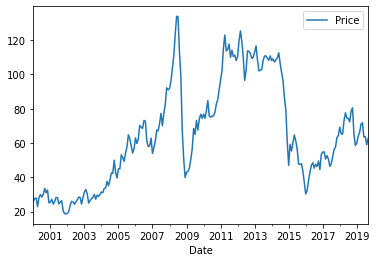

In [195]:
brent.resample('M').median().plot();

In [196]:
import seaborn as sns
sns.set()

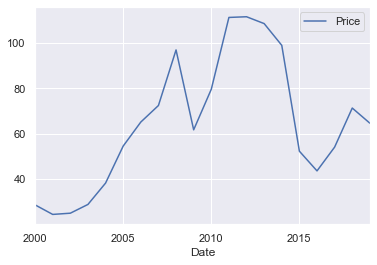

In [197]:
brent.resample('Y').mean().plot();

In [198]:
brent.resample('Y').mean().size

20

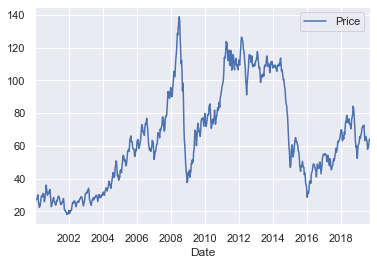

In [199]:
brent.resample('10D').mean().plot();

#### Upsampling And Interpolation

In [200]:
# resample frequency down -> downsample, eg. D(aily) -> M(onthly)
# resample frequency up   -> upsample, eg. D(aily) -> H(ourly)

In [201]:
# downsample: many -> fewer (aggregation)
# upsample: few -> many (interpolation)

In [202]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [203]:
brent.resample('8H').mean()

,Price
Date,
2000-01-04 00:00:00,23.95
2000-01-04 08:00:00,NaN
2000-01-04 16:00:00,NaN
2000-01-05 00:00:00,23.72
2000-01-05 08:00:00,NaN
...,...
2019-09-28 16:00:00,NaN
2019-09-29 00:00:00,NaN
2019-09-29 08:00:00,NaN


In [204]:
# linear interpolation

In [205]:
# ASIDE===

In [206]:
# 23.95 N1 N2 23.72

In [207]:
diff = (23.72 - 23.95) / 3

In [208]:
# key assumption in linear interpolation: distances are equal; the items are equally spaced

In [209]:
N1 = 23.95 + diff

In [210]:
N1

23.87333333333333

In [211]:
N2 = N1 + diff

In [212]:
N2

23.796666666666663

In [213]:
N2 + diff

23.719999999999995

In [214]:
# ===END ASIDE

In [215]:
brent.resample('8H').interpolate(method='linear')

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.873333
2000-01-04 16:00:00,23.796667
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.663333
...,...
2019-09-28 16:00:00,61.652222
2019-09-29 00:00:00,61.486667
2019-09-29 08:00:00,61.321111


In [216]:
brent.resample('8H').interpolate(method='spline', order=3)

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.013531
2000-01-04 16:00:00,23.117453
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.319619
...,...
2019-09-28 16:00:00,61.240570
2019-09-29 00:00:00,61.195778
2019-09-29 08:00:00,61.176797


In [217]:
brent.resample('2H').interpolate(method='akima')

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 02:00:00,23.928478
2000-01-04 04:00:00,23.907269
2000-01-04 06:00:00,23.886406
2000-01-04 08:00:00,23.865926
...,...
2019-09-29 16:00:00,61.289907
2019-09-29 18:00:00,61.217787
2019-09-29 20:00:00,61.143750


#### What About asfreq()?

In [ ]:
# downsample: many -> few (aggregation)
# upsample:   few -> many (interpolation)

In [ ]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [ ]:
brent.asfreq('10D')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,NaN
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,NaN


In [ ]:
'2000-02-13' in brent.index

False

In [ ]:
pd.Timestamp('2000-02-13').day_name()

'Sunday'

In [ ]:
brent.asfreq('10D', method='ffill')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,27.82
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,61.04


In [ ]:
brent.loc['2000-02-11']

Price    27.82
Name: 2000-02-11 00:00:00, dtype: float64

In [ ]:
brent.asfreq('10D', fill_value=brent.values.mean())

,Price
Date,
2000-01-04,23.950000
2000-01-14,25.500000
2000-01-24,27.020000
2000-02-03,27.600000
2000-02-13,64.358078
...,...
2019-08-12,57.130000
2019-08-22,59.810000
2019-09-01,64.358078


In [ ]:
brent.asfreq('M', method='ffill')

,Price
Date,
2000-01-31,27.08
2000-02-29,29.01
2000-03-31,23.98
2000-04-30,23.79
2000-05-31,29.64
...,...
2019-05-31,66.78
2019-06-30,67.52
2019-07-31,64.07


In [ ]:
# how is this different from resample

In [ ]:
brent.resample('M').median()

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


In [ ]:
# asfreq() -> it merely selects from the time series
# resample() -> like groupby with date-time capabilities

#### BONUS: Rolling Windows

In [218]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [219]:
# window size: 3
# aggfunc:     mean()

In [220]:
(brent.iloc[0] + brent.iloc[1] + brent.iloc[2]) / 3 # 1st in the window

Price    23.74
dtype: float64

In [221]:
(brent.iloc[1] + brent.iloc[2] + brent.iloc[3]) / 3 # 2nd in the window

Price    23.54
dtype: float64

In [ ]:
brent.rolling(3).mean()

,Price
Date,
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,23.740000
2000-01-07,23.540000
2000-01-10,23.223333
...,...
2019-09-24,64.673333
2019-09-25,63.733333
2019-09-26,62.873333


In [ ]:
brent.rolling(10).mean().head(10)

,Price
Date,
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
2000-01-10,NaN
2000-01-11,NaN
2000-01-12,NaN
2000-01-13,NaN
2000-01-14,NaN


In [ ]:
# visualizing moving averages

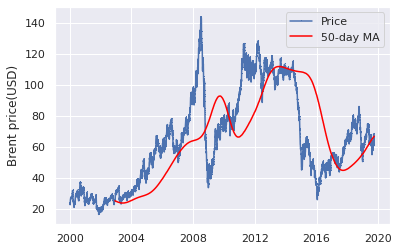

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.plot(brent, marker=',', label='Price');
ax.plot(brent.rolling(750, win_type='blackman').mean(), color='red', label='750-day MA');

ax.legend();
ax.set_ylabel('Brent price(USD)');

#### Skill Challenge

###### **1.**

Add a new column (called Quarter) to the *brent* dataframe that contains each date's respective calendar quarter, eg. 2000-01-04 would be quarter 1.

###### **2.**

Using the new *Quarter* column and the groupby() method, calculate the average price and standard deviation for each quarter of the year 2014.

###### 🔥 **3.**

Reproduce the Price average and standard deviation output from Part 2 above, but this time using resample and without relying on the Quarter column.

#### Solution

In [222]:
# 1

In [223]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [224]:
brent['Quarter'] = brent.index.quarter

In [225]:
brent.head()

,Price,Quarter
Date,,
2000-01-04,23.95,1
2000-01-05,23.72,1
2000-01-06,23.55,1
2000-01-07,23.35,1
2000-01-10,22.77,1


In [226]:
brent.sample(10)

,Price,Quarter
Date,,
2000-01-10,22.77,1
2007-04-16,67.10,2
2005-01-12,43.75,1
2000-06-09,29.00,2
2016-01-11,30.14,1
2014-01-24,109.14,1
2003-08-06,30.01,3
2017-07-07,46.47,3
2007-06-21,71.81,2


In [227]:
# # 2

# - select 2014 prices
# - group by quarter
# - apply the mean and std

In [228]:
brent['2014'].groupby('Quarter').agg({'mean', 'std'})

Price            
               std        mean
Quarter                       
1         1.280641  108.141935
2         2.406442  109.694063
3         4.364868  101.899844
4        11.410171   76.429219

In [229]:
brent.loc['2014'].groupby('Quarter').agg(average_price=('Price', 'mean'),
                                         std_price=('Price', 'std'))

,average_price,std_price
Quarter,,
1,108.141935,1.280641
2,109.694063,2.406442
3,101.899844,4.364868
4,76.429219,11.410171


In [230]:
# 3

In [231]:
brent.loc['2014', 'Price'].resample('Q').agg({'mean', 'std'})

,std,mean
Date,,
2014-03-31,1.280641,108.141935
2014-06-30,2.406442,109.694063
2014-09-30,4.364868,101.899844
2014-12-31,11.410171,76.429219
